In [1]:
#IMPORTANT WARNING : If you want to run the code, do not run the 3 last blocks. 
#They take a lot of time to compile, and you would loose a lot of time doing that.

In [12]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [13]:
def charger_images(dossier):
    images = []
    labels = []
    label_dict = {}

    for i, classe in enumerate(os.listdir(dossier)):
        label_dict[i] = classe

        for fichier in os.listdir(os.path.join(dossier, classe)):
            chemin_image = os.path.join(dossier, classe, fichier)
            image = cv2.imread(chemin_image)
            image = cv2.resize(image, (64, 224))  
            images.append(image)
            labels.append(i)
        print(len(images))
    return np.array(images), np.array(labels), label_dict

In [14]:
dossier_donnees = "flower_images"
X, y, label_dict = charger_images(dossier_donnees)

980
1980
2980
3980
4980


In [15]:
X = X / 255.0

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = models.Sequential() 
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 64, 3))) #removable 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32 * 2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(label_dict), activation='softmax'))


model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

model1=model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
125/125 [==============================] - 17s 134ms/step - loss: 1.3028 - accuracy: 0.5013 - val_loss: 1.1225 - val_accuracy: 0.5673
Epoch 2/10
125/125 [==============================] - 16s 128ms/step - loss: 0.8620 - accuracy: 0.6722 - val_loss: 0.8654 - val_accuracy: 0.6898
Epoch 3/10
125/125 [==============================] - 17s 140ms/step - loss: 0.5256 - accuracy: 0.8168 - val_loss: 0.8718 - val_accuracy: 0.7369
Epoch 4/10
125/125 [==============================] - 17s 138ms/step - loss: 0.2820 - accuracy: 0.9086 - val_loss: 0.6691 - val_accuracy: 0.8143
Epoch 5/10
125/125 [==============================] - 17s 134ms/step - loss: 0.1445 - accuracy: 0.9581 - val_loss: 0.7238 - val_accuracy: 0.8022
Epoch 6/10
125/125 [==============================] - 17s 139ms/step - loss: 0.0726 - accuracy: 0.9844 - val_loss: 0.7160 - val_accuracy: 0.8524
Epoch 7/10
125/125 [==============================] - 19s 156ms/step - loss: 0.0385 - accuracy: 0.9932 - val_loss: 0.7113 - val_ac

In [17]:
print(f"Accuracy : {model1.history['accuracy'][-1]*100:.2f}")
print(f"Val Accuracy : {model1.history['val_accuracy'][-1]*100:.2f}")

Accuracy : 99.22
Val Accuracy : 84.04


156/156 [==============================] - 4s 27ms/step


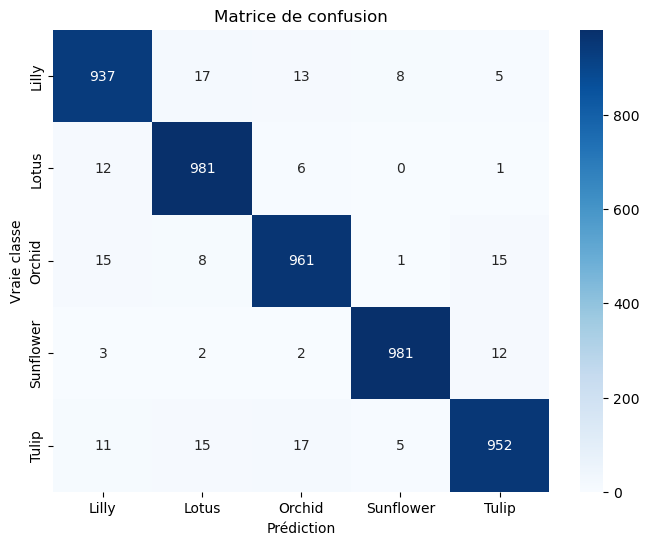

In [18]:
y_pred = np.argmax(model.predict(X), axis=1)


cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict.values(), yticklabels=label_dict.values())
plt.xlabel('Prédiction')
plt.ylabel('Vraie classe')
plt.title('Matrice de confusion')
plt.show()


In [19]:
print("Rapport de classification :")
print(classification_report(y, y_pred, target_names=label_dict.values()))

Rapport de classification :
              precision    recall  f1-score   support

       Lilly       0.96      0.96      0.96       980
       Lotus       0.96      0.98      0.97      1000
      Orchid       0.96      0.96      0.96      1000
   Sunflower       0.99      0.98      0.98      1000
       Tulip       0.97      0.95      0.96      1000

    accuracy                           0.97      4980
   macro avg       0.97      0.97      0.97      4980
weighted avg       0.97      0.97      0.97      4980



In [20]:
dossier_test = "flower_images"
X2, y2, label_dict2 = charger_images(dossier_test)

loss, accuracy = model.evaluate(X2, y2)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

980
1980
2980
3980
4980
156/156 [==============================] - 4s 24ms/step - loss: 49.3381 - accuracy: 0.9512
Loss: 49.338138580322266
Accuracy: 0.9512048363685608


In [21]:
dossier_test = "Testr"
X2, y2, label_dict2 = charger_images(dossier_test)

loss, accuracy = model.evaluate(X2, y2)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

10
20
30
40
50
2/2 [==============================] - 0s 18ms/step - loss: 171.4639 - accuracy: 0.8400
Loss: 171.4639129638672
Accuracy: 0.8399999737739563


2/2 [==============================] - 0s 17ms/step


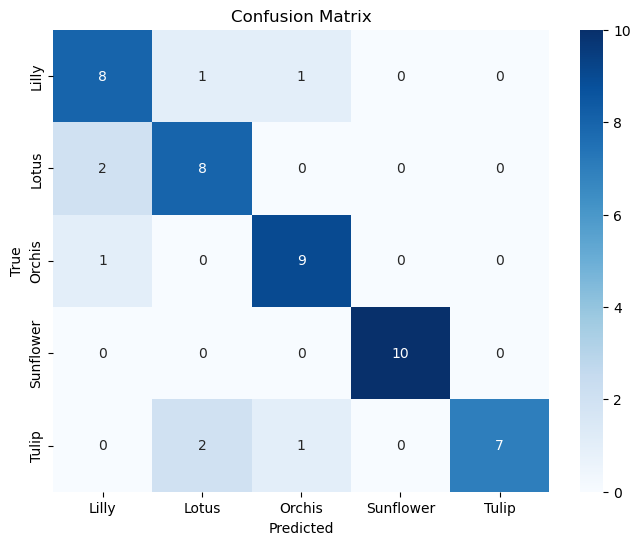

In [22]:
y2_pred = model.predict(X2)
y2_pred_classes = np.argmax(y2_pred, axis=1)

conf_matrix2 = confusion_matrix(y2, y2_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=label_dict2.values(), yticklabels=label_dict2.values())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/30
125/125 [==============================] - 18s 138ms/step - loss: 1.2755 - accuracy: 0.4601 - val_loss: 1.0703 - val_accuracy: 0.5683
Epoch 2/30
125/125 [==============================] - 17s 137ms/step - loss: 0.9923 - accuracy: 0.6192 - val_loss: 0.9506 - val_accuracy: 0.6436
Epoch 3/30
125/125 [==============================] - 17s 135ms/step - loss: 0.7868 - accuracy: 0.6960 - val_loss: 0.8164 - val_accuracy: 0.7118
Epoch 4/30
125/125 [==============================] - 17s 136ms/step - loss: 0.5346 - accuracy: 0.8090 - val_loss: 0.7044 - val_accuracy: 0.7520
Epoch 5/30
125/125 [==============================] - 17s 136ms/step - loss: 0.3009 - accuracy: 0.8986 - val_loss: 0.8189 - val_accuracy: 0.7691
Epoch 6/30
125/125 [==============================] - 17s 134ms/step - loss: 0.1895 - accuracy: 0.9420 - val_loss: 0.8533 - val_accuracy: 0.7962
Epoch 7/30
125/125 [==============================] - 17s 135ms/step - loss: 0.1037 - accuracy: 0.9731 - val_loss: 0.7689 - val_ac

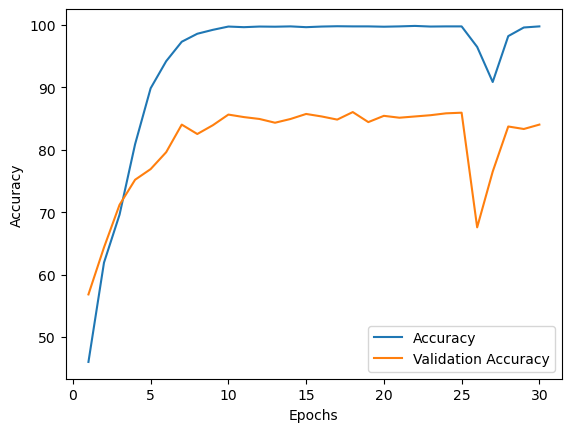

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
all_acc = []
all_val_acc = []


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32 * 2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32 * 2, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(label_dict), activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

  

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))


train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


for epoch, (train_acc, val_acc) in enumerate(zip(train_accuracy, val_accuracy), 1):
    print(f'Epoch {epoch}: Train Accuracy = {train_acc}, Validation Accuracy = {val_acc}')
    all_acc.append(train_acc * 100) 
    all_val_acc.append(val_acc * 100) 

epoch_list = range(1, 31)  
plt.plot(epoch_list, all_acc, label='Accuracy')
plt.plot(epoch_list, all_val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/5
399/399 [==============================] - 36s 88ms/step - loss: 1.3951 - accuracy: 0.4061 - val_loss: 1.2013 - val_accuracy: 0.4588
Epoch 2/5
399/399 [==============================] - 34s 85ms/step - loss: 1.2269 - accuracy: 0.4892 - val_loss: 1.1178 - val_accuracy: 0.5301
Epoch 3/5
399/399 [==============================] - 34s 84ms/step - loss: 1.1383 - accuracy: 0.5324 - val_loss: 1.0276 - val_accuracy: 0.5733
Epoch 4/5
399/399 [==============================] - 35s 87ms/step - loss: 1.0760 - accuracy: 0.5688 - val_loss: 0.9603 - val_accuracy: 0.6295
Epoch 5/5
399/399 [==============================] - 34s 85ms/step - loss: 1.0368 - accuracy: 0.5876 - val_loss: 0.9439 - val_accuracy: 0.6114
Epoch 1/5
160/160 [==============================] - 26s 161ms/step - loss: 0.9412 - accuracy: 0.6315 - val_loss: 0.8646 - val_accuracy: 0.6637
Epoch 2/5
160/160 [==============================] - 25s 157ms/step - loss: 0.9109 - accuracy: 0.6398 - val_loss: 0.8076 - val_accuracy: 0.67

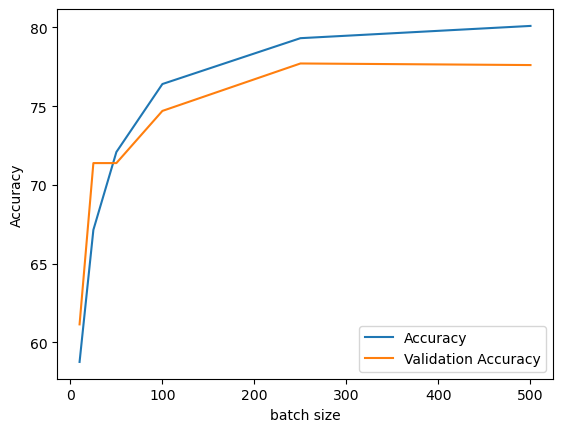

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
all_acc2 = []
all_val_acc2 = []


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32 * 2, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32 * 2, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(len(label_dict), activation='softmax'))


model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

datagen = ImageDataGenerator(
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    shear_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=True,
    fill_mode='nearest'
)


batch_size_values=[10,25,50,100,250,500]
for x in batch_size_values :
    m=model.fit(datagen.flow(X_train, y_train, batch_size=x), epochs=5, validation_data=(X_test, y_test))
    all_acc2.append(m.history['accuracy'][-1] * 100)  # Ajout des valeurs d'accuracy à la liste
    all_val_acc2.append(m.history['val_accuracy'][-1] * 100)  # Ajout des valeurs de val_accuracy à la liste

plt.plot(batch_size_values, all_acc2, label='Accuracy')
plt.plot(batch_size_values, all_val_acc2, label='Validation Accuracy')
plt.xlabel('batch size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

optimizer_options = ['adam', 'sgd', 'rmsprop']
learning_rate_options = [0.001, 0.01, 0.1]
num_filters_options = [32, 64]
num_dense_units_options = [64, 128]

for opt in optimizer_options:
    for lr in learning_rate_options:
        for nf in num_filters_options:
            for ndu in num_dense_units_options:
                
                model = models.Sequential()
                model.add(layers.Conv2D(nf, (3, 3), activation='relu', input_shape=(224, 64, 3)))
                model.add(layers.MaxPooling2D((2, 2)))
                model.add(layers.Conv2D(nf * 2, (3, 3), activation='relu'))
                model.add(layers.MaxPooling2D((2, 2)))
                model.add(layers.Conv2D(nf * 2, (3, 3), activation='relu'))
                model.add(layers.Flatten())
                model.add(layers.Dense(ndu, activation='relu'))
                model.add(layers.Dense(len(label_dict), activation='softmax'))

                
                model.compile(optimizer=opt,
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

               
                model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

              
                val_loss, val_accuracy = model.evaluate(X_test, y_test)
                print(f"Optimiseur: {opt}, Taux d'apprentissage: {lr}, "
                      f"Nombre de filtres: {nf}, Nombre d'unités dans la couche dense: {ndu}")
                print(f"Précision sur l'ensemble de validation: {val_accuracy * 100:.2f}%\n")



Epoch 1/5
125/125 [==============================] - 16s 120ms/step - loss: 1.2826 - accuracy: 0.4689 - val_loss: 1.0779 - val_accuracy: 0.5512
Epoch 2/5
125/125 [==============================] - 14s 114ms/step - loss: 1.0526 - accuracy: 0.5808 - val_loss: 0.9629 - val_accuracy: 0.6335
Epoch 3/5
125/125 [==============================] - 15s 116ms/step - loss: 0.8654 - accuracy: 0.6722 - val_loss: 0.8952 - val_accuracy: 0.6647
Epoch 4/5
125/125 [==============================] - 14s 111ms/step - loss: 0.6208 - accuracy: 0.7721 - val_loss: 0.6892 - val_accuracy: 0.7661
Epoch 5/5
32/32 [==============================] - 1s 25ms/step - loss: 0.7157 - accuracy: 0.7661
Optimiseur: adam, Taux d'apprentissage: 0.001, Nombre de filtres: 32, Nombre d'unités dans la couche dense: 64
Précision sur l'ensemble de validation: 76.61%

Epoch 1/5
125/125 [==============================] - 18s 135ms/step - loss: 1.3450 - accuracy: 0.4478 - val_loss: 1.1266 - val_accuracy: 0.5612
Epoch 2/5
125/125 [====

Epoch 1/5
125/125 [==============================] - 14s 111ms/step - loss: 1.4558 - accuracy: 0.3582 - val_loss: 1.3436 - val_accuracy: 0.4177
Epoch 2/5
125/125 [==============================] - 13s 106ms/step - loss: 1.2842 - accuracy: 0.4498 - val_loss: 1.2697 - val_accuracy: 0.4408
Epoch 3/5
125/125 [==============================] - 13s 107ms/step - loss: 1.1995 - accuracy: 0.5073 - val_loss: 1.3943 - val_accuracy: 0.4096
Epoch 4/5
125/125 [==============================] - 13s 106ms/step - loss: 1.1500 - accuracy: 0.5208 - val_loss: 1.1837 - val_accuracy: 0.4920
Epoch 5/5
32/32 [==============================] - 1s 26ms/step - loss: 1.0499 - accuracy: 0.5924
Optimiseur: sgd, Taux d'apprentissage: 0.01, Nombre de filtres: 32, Nombre d'unités dans la couche dense: 128
Précision sur l'ensemble de validation: 59.24%

Epoch 1/5
125/125 [==============================] - 34s 268ms/step - loss: 1.4928 - accuracy: 0.3409 - val_loss: 1.4189 - val_accuracy: 0.3956
Epoch 2/5
125/125 [=====

Epoch 1/5
125/125 [==============================] - 37s 294ms/step - loss: 1.4930 - accuracy: 0.4199 - val_loss: 1.1432 - val_accuracy: 0.5211
Epoch 2/5
125/125 [==============================] - 36s 289ms/step - loss: 1.1033 - accuracy: 0.5582 - val_loss: 0.9855 - val_accuracy: 0.6516
Epoch 3/5
125/125 [==============================] - 35s 278ms/step - loss: 0.9432 - accuracy: 0.6318 - val_loss: 0.8822 - val_accuracy: 0.6486
Epoch 4/5
125/125 [==============================] - 35s 280ms/step - loss: 0.6970 - accuracy: 0.7322 - val_loss: 0.8129 - val_accuracy: 0.7129
Epoch 5/5
32/32 [==============================] - 2s 64ms/step - loss: 0.7298 - accuracy: 0.7761
Optimiseur: rmsprop, Taux d'apprentissage: 0.1, Nombre de filtres: 64, Nombre d'unités dans la couche dense: 64
Précision sur l'ensemble de validation: 77.61%

Epoch 1/5
125/125 [==============================] - 40s 315ms/step - loss: 1.4832 - accuracy: 0.4084 - val_loss: 1.2451 - val_accuracy: 0.4779
Epoch 2/5
125/125 [===